In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# sns.set_context("paper")

np.random.seed(2020)

In [16]:
from datetime import datetime

In [2]:
df1 = pd.read_excel('./面试题目1资料.xlsx',0)

C:\Users\TIME~1.DEL\AppData\Local\Temp/ipykernel_3656/3171688619.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  df1 = pd.read_excel('./面试题目1资料.xlsx',0)


In [3]:
df2 = pd.read_excel('./面试题目1资料.xlsx',1)

# 一、销售状况

## （一）销售日表(按日期汇总订单量和销售额,画出趋势图,判断销售高峰期)

In [4]:
df1['日期'] = df1['购买日期'].dt.date

In [5]:
sell_info_day = df1[df1['订单状态']=='已发货'].groupby(['日期']).agg({'日期':'count','销售价':'sum'})

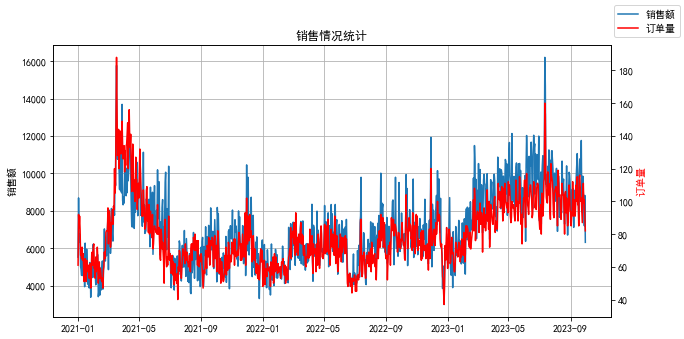

In [71]:
plt.figure(figsize=(10, 5))

ax1 = plt.gca()
ax1.plot(sell_info_day.index, sell_info_day['销售价'], label='销售额')
ax1.set_ylabel('销售额')

ax2 = ax1.twinx()
ax2.plot(sell_info_day.index, sell_info_day['日期'], label='订单量', color='red') 
ax2.set_ylabel('订单量', color='red')

plt.xticks(rotation=45)
plt.title('销售情况统计')

ax1.figure.legend()

ax1.grid(True)

plt.show()

## (二) 销售月表 （分析不同月份、季度的销售情况,区分旺季和淡季）

In [64]:
df1['月份'] = df1['购买日期'].apply(lambda x: datetime.strftime(x, '%Y-%m'))

In [65]:
sell_info_month = df1[df1['订单状态']=='已发货'].groupby(['月份']).agg({'月份':'count','销售价':'sum'})

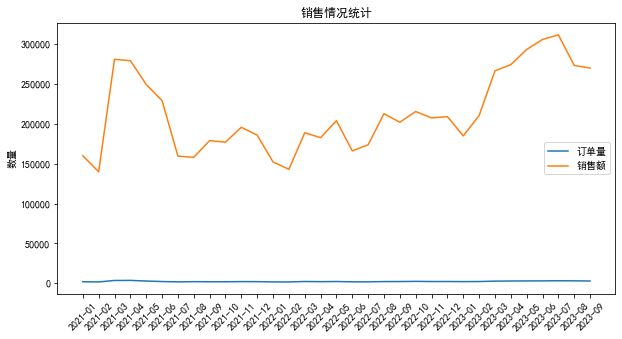

In [83]:
plt.figure(figsize=(10, 5))
plt.plot(sell_info_month.index, sell_info_month['月份'], label='订单量')

plt.plot(sell_info_month.index, sell_info_month['销售价'], label='销售额')

plt.xticks(rotation=45) 
plt.legend()
plt.ylabel('数量')
plt.title('销售情况统计')

plt.show()

## (三)  渠道分析 （按订单来源汇总分析,判断最重要渠道）

In [32]:
df_by_source = df1.groupby('订单来源').agg({'viomall单号':'count', '销售价':'sum'})

In [33]:
df_by_source.sort_values(by=['viomall单号', '销售价'], ascending=False)

,viomall单号,销售价
订单来源,,
amazon,68589,6343123.04
ebay,9734,586538.14
other,2649,183804.22


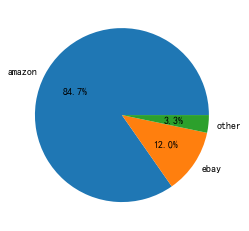

In [35]:
axes = df_by_source['viomall单号'].plot.pie(autopct='%1.1f%%')
axes.set_ylabel('')
plt.show()

## （四）退款分析

In [42]:
refund_df = df1[df1['订单状态']=='已取消']

In [59]:
refund_stat = refund_df.groupby('产品SKU1').agg({
    'viomall单号': 'count', 
    '退款金额': 'sum'
})

In [61]:
refund_stat.rename(columns={'viomall单号':'退款订单量'}).sort_values(by="退款金额",ascending=True).head(10)

,退款订单量,退款金额
产品SKU1,,
A80253-S07-E,1,-1042.99
A80034-1269,15,-1026.49
A80034-12110,3,-578.70
A80097-NH082F,1,-578.22
A86162-02ETA1202RBK,2,-538.34
A80097-NH043FN,1,-512.99
A80065-CMH82056,1,-506.13
A80034-1261,9,-401.28
A80034-1215,4,-398.42


# 二、卖家状况

## （一）对卖家评级分部进行统计，以扇形统计图展示

In [22]:
seller = df1[['卖家','卖家等级']].drop_duplicates()

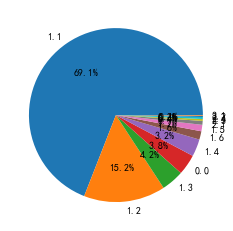

In [23]:
axes = seller['卖家等级'].value_counts(sort=True).plot.pie(autopct='%1.1f%%')
axes.set_ylabel('')
plt.show()

## （二）优秀商家

### 1.订单量最多的客户

In [25]:
df1[df1['订单状态']=='已发货'].groupby(['卖家','卖家等级'])['订单状态'].count().sort_values(ascending=False).head(10)

卖家           卖家等级
常*沃*贸易天-亚马逊  2.4     6449
D*I*         2.3     5851
天*里克*商务天     2.2     3421
滁*莱*         2.3     2885
亚*天籍*        2.4     2368
合*比亚*1       2.1     2299
邓**          1.5     1792
上*擎*         1.6     1541
d*le*        2.1     1302
常*鸿普*制造天     1.6     1181
Name: 订单状态, dtype: int64

### 2.销售额最多的客户

In [26]:
df1[df1['订单状态']=='已发货'].groupby(['卖家','卖家等级'])['销售价'].sum().sort_values(ascending=False).head(10)

卖家           卖家等级
常*沃*贸易天-亚马逊  2.4     1286357.65
D*I*         2.3      502108.79
天*里克*商务天     2.2      307942.98
常*鸿普*制造天     1.6      222945.56
亚*天籍*        2.4      191598.96
合*比亚*1       2.1      190613.93
滁*莱*         2.3      177946.39
邓**          1.5      164494.01
d*le*        2.1       98378.73
上*擎*         1.6       91501.80
Name: 销售价, dtype: float64

# 三、产品状况

## （一）热门商品（按SKU汇总销量）

In [27]:
df1[df1['订单状态']=='已发货'].groupby('产品SKU1')['产品SKU1'].count().sort_values(ascending=False).head(10)

产品SKU1
A80034-1269     2262
A80034-12103     999
A80052-94623     752
A80052-94040     437
A80034-1215      397
A80034-1201      383
A80052-94251     378
A80034-1261      364
A80034-1248T     359
A80034-1209      354
Name: 产品SKU1, dtype: int64

## (二) 高利润商品

In [29]:
df1['单品利润'] = df1['销售价'] - df1['分销价']
df1['总利润'] = df1['单品利润'] * df1['产品数量1']

In [31]:
df1[df1['订单状态']=='已发货'].groupby('产品SKU1')['总利润'].sum().sort_values(ascending=False).head(10)

产品SKU1
A80034-1269         101379.87
A80034-12103         35156.29
A80015-OD6110033     26018.96
A80015-OD6110004     16526.48
A80034-1215          14511.81
A80034-30103         14271.30
A80034-1201          13794.83
A80034-1248T         13231.41
A80034-1202          12914.92
A80034-1228          11834.11
Name: 总利润, dtype: float64